In [24]:
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize) # show full ndarray

In [25]:
directory = '../Snapshots/'

# iterate over each snapshot
initialise = True
for filename in os.listdir(directory):
#     snapshot = np.flip(np.load(directory+filename), axis=0) # the deep map origin is on the top
    snapshot = np.load(directory+filename)# the deep map origin is on the top
    
    snapshot = snapshot[:, 255] # take the middle column
    if initialise is True:
        prior = snapshot
        initialise = False
    else:
        prior = np.vstack((prior, snapshot))  

prior = prior.T
prior_mean = np.ma.masked_invalid(prior).mean(axis=1)  # ignore the inf

height = np.array(range(512))
prior_dist = np.append(height[:, None], prior_mean[:, None], axis=1)

column_values = ['Height', 'Distance']
  
# creating the dataframe
prior_dist_df = pd.DataFrame(data = prior_dist, 
                  columns = column_values)
  
prior_dist_df.to_pickle('prior_dist') 

<AxesSubplot:xlabel='Distance', ylabel='Height'>

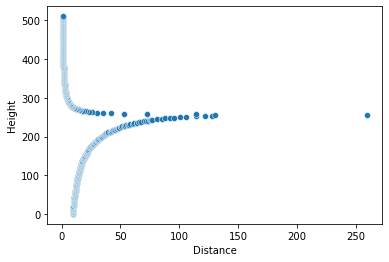

In [26]:
prior_dist_df = pd.read_pickle('prior_dist')
sns.scatterplot(data=prior_dist_df, x="Distance", y="Height")

I think we need a plot using polar coordinates to match what Yang and Purves show in Figure 5c. The plot below seems qualitatively similar to their result for angles lower than eye level, but seems qualitatively different for angles

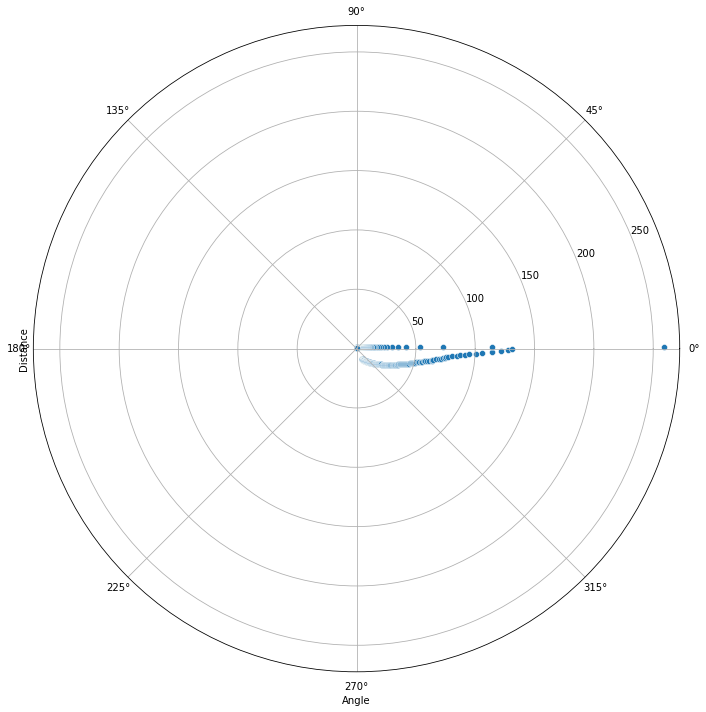

In [40]:
prior_dist_df["TransformedHeight"] = prior_dist_df["Height"] - 256
prior_dist_df["Angle"] = np.arctan((prior_dist_df["TransformedHeight"] + 0.5)/128)

# plot in polar coordinates
g = sns.FacetGrid(prior_dist_df, subplot_kws=dict(projection='polar'), height=10, despine=False)
g.map_dataframe(sns.scatterplot, x='Angle', y='Distance')
plt.show()